# SVM - Solution with scikit-learn

In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install -U scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

In [164]:
def plot_decision_function(clf):
    """ Creates the plot of the decision function. """
    # plot the decision function
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax,
    )    
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k"
    )
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    #plt.show()
    
def plot_hyperplane(clf):
    """ Plots only the hyperplane for given clf. """
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-6.1, -0.4)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.plot(xx, yy, 'k-', alpha=0.5)

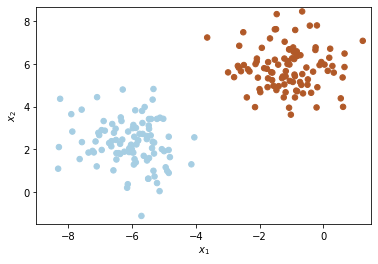

In [169]:
# create N separable points
N = 200  # number of samples
D = 2  # number of dimensions
C = 2  # number of classes
seed = 1234  # for reproducible experiments 
alpha_tol = 1e-4 # threshold for choosing support vectors 
X, y = make_blobs(n_samples=N, n_features=D, centers=C, random_state=seed)
y[y == 0] = -1 # class 0 => class -1
plt.xlim(-9,1.5)
plt.ylim(-1.5,8.7)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired);

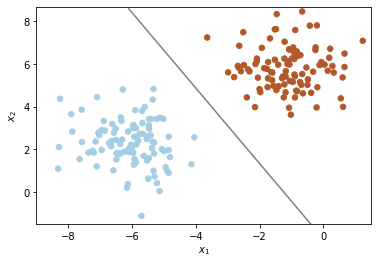

In [166]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.xlim(-9,1.5)
plt.ylim(-1.5,8.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plot_hyperplane(clf)

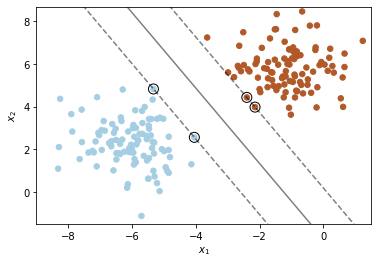

In [167]:
plt.xlim(-9,1.5)
plt.ylim(-1.5,8.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plot_decision_function(clf)

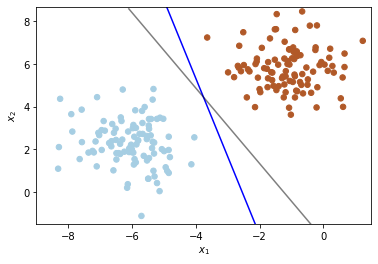

In [168]:
# Alternative Hyperplane 
xl = [-2, -5]
yl = [-2, 9]

xl2 = [-1.2, -4.2]
yl2= [-2, 9]

xl3 = [-2.8, -5.8]
yl3= [-2, 9]

plt.xlim(-9,1.5)
plt.ylim(-1.5,8.7)
plt.plot(xl, yl, 'b-')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plot_hyperplane(clf)
plt.show()

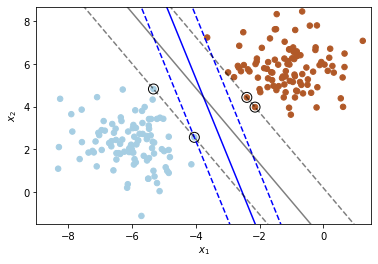

In [170]:
plt.xlim(-9,1.5)
plt.ylim(-1.5,8.7)
plt.plot(xl, yl, 'b-')
plt.plot(xl2, yl2, 'b--')
plt.plot(xl3, yl3, 'b--')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plot_decision_function(clf)
plt.show()

In [15]:
print('w = ',clf.coef_[0])
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))
alphas = np.abs(clf.dual_coef_)

w =  [0.73943539 0.41784889]
b =  [0.92000545]
Indices of support vectors =  [ 78 134 158 182]
Support vectors =  [[-5.32793628  4.83313594]
 [-4.0459191   2.56444886]
 [-2.14234939  3.9827786 ]
 [-2.40004619  4.43910262]]
Coefficients of the support vector in the decision function =  [[0.11203826 0.24858238 0.00878808 0.35183257]]


In [16]:
# Predict new vector [0, -8] (neg.) and [2, 8] (pos.)
s1 = clf.predict(np.array([0,-8]).reshape(1,-1))[0]
s2 = clf.predict(np.array([2,8]).reshape(1,-1))[0]
print(f"The sign of the vector [0, -8] is {s1}.")
print(f"The sign of the vector [2, 8] is {s2}.")

The sign of the vector [0, -8] is -1.
The sign of the vector [2, 8] is 1.
